In [3]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt

In [73]:
x = np.linspace(0, 10, 100)
y = 3 * x + 10 + np.random.randn(100) * 2

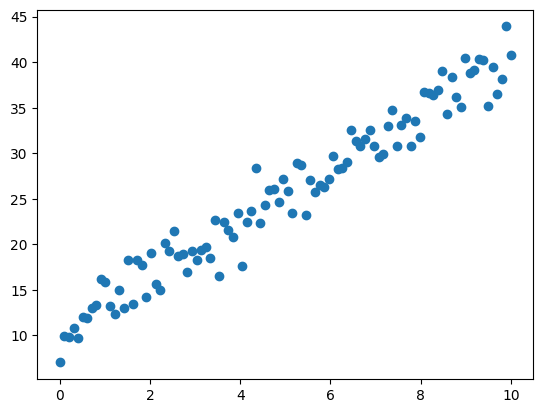

In [74]:
plt.scatter(x, y)
plt.show()

In [33]:
def forward_loss(X_batch: ndarray,
                 y_batch: ndarray,
                 weights: ndarray):
    assert X_batch.shape[0] == y_batch.shape[0]
    assert X_batch.shape[1] == weights.shape[0]
    
    # performing dot product
    h: ndarray = X_batch.dot(weights)
    
    # calculating the cost function
    J: float = np.mean(np.power(y_batch - h, 2))
    
    forward_info: dict[str, ndarray] = {
        "X": X_batch,
        "h": h,
        "y": y_batch
    }
    
    return J, forward_info

In [34]:
def loss_gradients(forward_info: dict[str, ndarray]) -> ndarray:
    dLdh: ndarray = (2 / len(forward_info["X"])) * (forward_info["h"] - forward_info["y"])
    dhdt: ndarray = np.transpose(forward_info["X"], (1, 0))
    dLdt: ndarray = np.dot(dhdt, dLdh)
    return dLdt

In [35]:
def init_weights(X: ndarray) -> ndarray:
    theta: ndarray = np.zeros(X.shape[1])
    return theta

In [48]:
def train(X: ndarray, 
          y: ndarray, 
          learning_rate: float = 0.01, 
          n_iter: int = 1000, 
          fit_intercept: bool = True):

    if fit_intercept:
        X: ndarray = np.vstack([np.ones(len(X)), X]).T
    else:
        X: ndarray = X.reshape(-1, 1)
    
    # initialize weights
    theta: ndarray = init_weights(X)
    
    losses = []
    
    for i in range(n_iter):
        loss, foward_info = forward_loss(X, y, theta) 
        
        losses.append(loss)
        
        loss_grads = loss_gradients(foward_info)
        
        theta -= learning_rate * loss_grads
        
    return losses, theta

In [75]:
losses, theta = train(x, y)

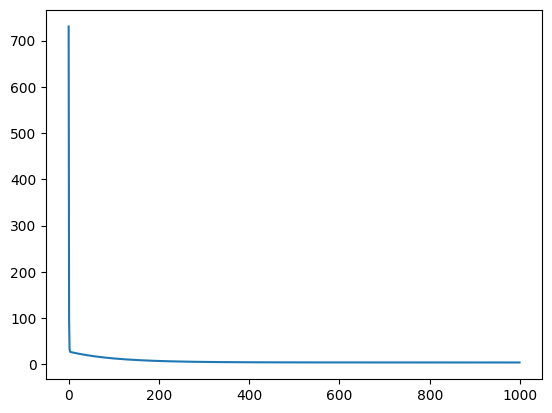

In [76]:
plt.plot(losses)
plt.show()

In [77]:
theta

array([10.25380725,  3.03985699])

In [78]:
train(x, y, fit_intercept=True)[1]

array([10.25380725,  3.03985699])

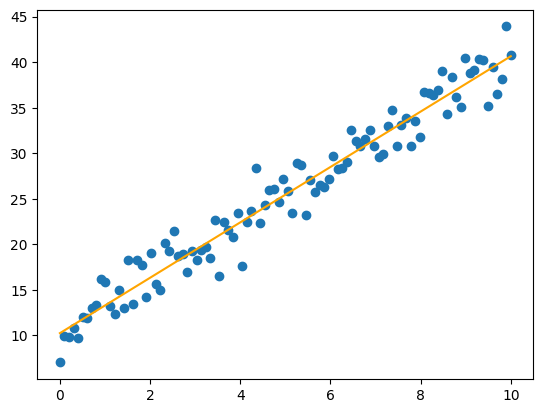

In [79]:
X = np.vstack([np.ones(x.shape[0]), x]).T
plt.scatter(x, y)
plt.plot(x, X.dot(theta), 'orange')
plt.show()